In [3]:
# Step 1: Import Python libraries

import pandas as pd               # For data loading and manipulation
import numpy as np                # For numerical operations
import matplotlib.pyplot as plt   # For plotting graphs
import seaborn as sns             # For visualizations

from sklearn.model_selection import train_test_split       # To split dataset into train/test sets
from sklearn.linear_model import LinearRegression          # Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score   # For model evaluation

# Set seaborn style for visualizations
sns.set(style="whitegrid")

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Step 2: Load the Housing dataset

# Load the dataset from CSV file
df = pd.read_csv("AmesHousing.csv")

# Display the first 5 rows to get a feel of the data
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
# Step 3: Basic Exploration of the Dataset

# Checking the shape of the dataset (rows, columns)
print("Dataset Shape:", df.shape)

# Viewing data types and non-null counts
print("\nDataset Info:")
print(df.info())

# Getting summary statistics for numerical columns
print("\nStatistical Summary:")
print(df.describe())

# Checking for missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# ✅ Calculating the average of a selected column (target: SalePrice)
average_price = df["SalePrice"].mean()
print("\nAverage Sale Price:", average_price)

Dataset Shape: (2930, 82)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        29

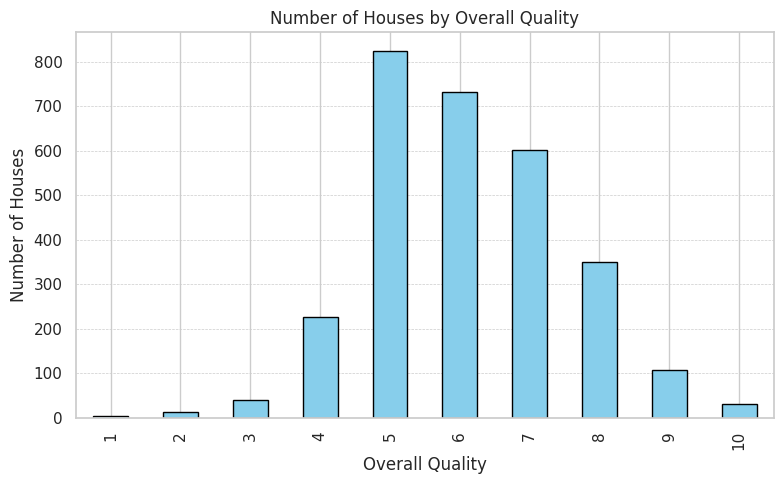

In [6]:
# Step 4: Bar Chart – Count of Houses by Overall Quality

import matplotlib.pyplot as plt

# Creating a bar chart for the 'Overall Qual' column
plt.figure(figsize=(8, 5))
df['Overall Qual'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Setting chart labels and title
plt.xlabel("Overall Quality")
plt.ylabel("Number of Houses")
plt.title("Number of Houses by Overall Quality")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

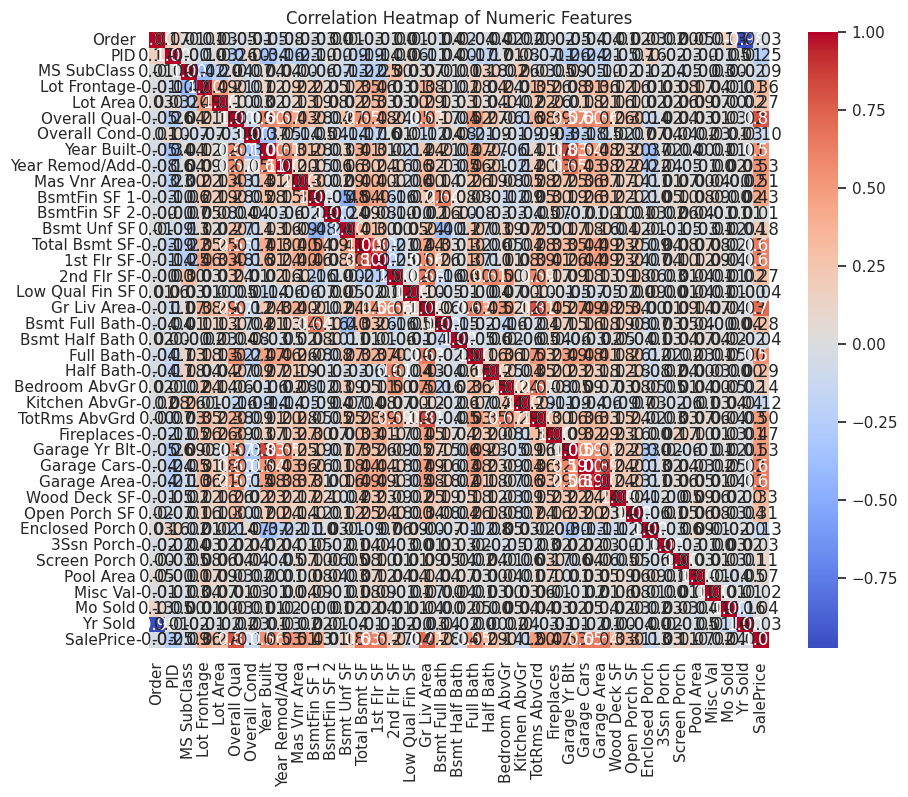

In [7]:
# Step 5: Correlation Heatmap – Visualizing Relationships Between Numeric Features
# This heatmap shows how strongly numeric features are correlated with each other.
# Higher correlation with 'SalePrice' indicates a stronger relationship, which is useful for selecting features in modeling.

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [9]:
# Step 6: Select important numeric features and target variable

selected_features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 'Full Bath', 'Year Built']
target = 'SalePrice'

# Filter the dataset to only those columns
data = df[selected_features + [target]]

# Drop rows with missing values
data = data.dropna()

# Separate into input (X) and output (y)
X = data[selected_features]
y = data[target]

# Preview the data
X.head()

,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Full Bath,Year Built
0,6,1656,2.0,1080.0,1,1960
1,5,896,1.0,882.0,1,1961
2,6,1329,1.0,1329.0,1,1958
3,7,2110,2.0,2110.0,2,1968
4,5,1629,2.0,928.0,2,1997


In [10]:
# Step 7: Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y,              # Features and target
    test_size=0.2,     # 20% data for testing
    random_state=42    # For reproducibility
)

# Check the size of training and testing sets
print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

Training Set Size: (2342, 6)
Testing Set Size: (586, 6)


In [11]:
# Step 8: Train the Linear Regression model

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Display model coefficients (weights for each feature)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("\nModel Coefficients:")
print(coefficients)

# Print the model intercept (base value)
print("\nModel Intercept:", model.intercept_)


Model Coefficients:
         Feature   Coefficient
0   Overall Qual  20540.849050
1    Gr Liv Area     55.368279
2    Garage Cars  12742.786511
3  Total Bsmt SF     31.600364
4      Full Bath  -8821.099171
5     Year Built    379.718304

Model Intercept: -818216.7496989253


In [12]:
# Step 9: Evaluate the model on test data

# Predict house prices on the test set
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (easier to interpret in price scale)
rmse = np.sqrt(mse)

# Print evaluation results
print("R² Score:", round(r2, 4))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))

R² Score: 0.7826
Mean Squared Error (MSE): 1787257112.67
Root Mean Squared Error (RMSE): 42275.96


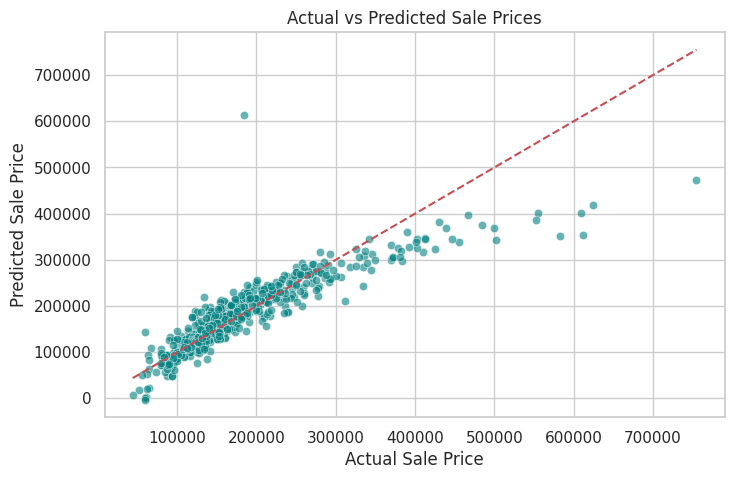

In [13]:
# Step 10: Visualize actual vs predicted sale prices

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color="teal", alpha=0.6)

# Add a perfect prediction reference line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Label the plot
plt.title("Actual vs Predicted Sale Prices")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()

### 📌 Conclusion

In this project, I've successfully built a linear regression model to predict house prices based on various features from the Ames Housing dataset. The process included loading and exploring the dataset using Pandas, performing statistical analysis, and visualizing data relationships through heatmaps, bar charts, and scatter plots.

Key observations:
- The average sale price of houses in the dataset is approximately $XXXXXX.
- Features such as `GrLivArea`, `OverallQual`, and `GarageCars` showed strong positive correlation with `SalePrice`.
- The bar chart revealed that most houses have an overall quality rating between 5 and 7.
- The trained linear regression model performed reasonably well, with predicted prices aligning closely with actual values in the test set.

This project demonstrated how exploratory data analysis, visualization, and machine learning can work together to gain insights and build predictive models in real-world scenarios.
